<a href="https://colab.research.google.com/github/devendradeore13/Data-Structure-using-Java/blob/main/Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_lables), (test_images, test_lables)= datasets.cifar10.load_data()

train_images, test_images= train_images/255.0, test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


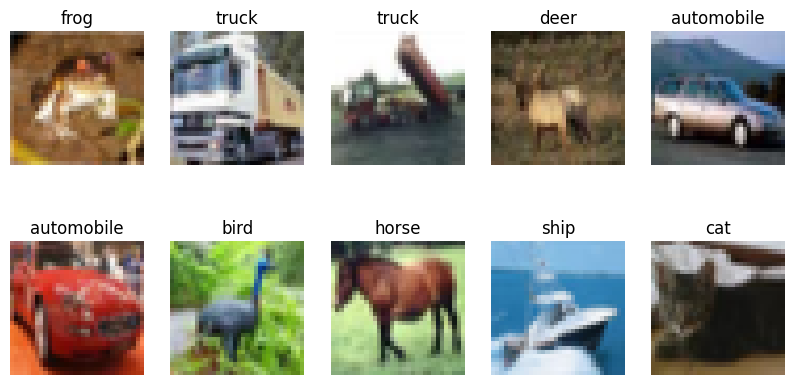

In [ ]:


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i] )
    plt.title(class_names[train_lables[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer= optimizers.SGD (learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_lables, epochs=15, batch_size=128, validation_data=(test_images, test_lables))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.2497 - loss: 2.1131 - val_accuracy: 0.3597 - val_loss: 1.8304
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.3706 - loss: 1.7994 - val_accuracy: 0.3933 - val_loss: 1.7278
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.3995 - loss: 1.7105 - val_accuracy: 0.4111 - val_loss: 1.6786
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.4233 - loss: 1.6436 - val_accuracy: 0.4211 - val_loss: 1.6382
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.4368 - loss: 1.6107 - val_accuracy: 0.4337 - val_loss: 1.6036
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.4522 - loss: 1.5670 - val_accuracy: 0.4538 - val_loss: 1.5472
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.4566 - loss: 1.5455 - val_accuracy: 0.4542 - val_loss: 1.5322
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.4730 - loss: 1.5014 - 

In [ ]:
test_loss, test_acc= model.evaluate(test_images, test_lables, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.5033 - loss: 1.4006
Test accuracy: 0.5033000111579895


In [ ]:
#optional
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
train_labels= lb.fit_transform(test_lables)
test_labels = lb.transform(test_lables)

predictions = model.predict(test_images, batch_size=128)


print(classification_report(test_labels.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1000
           1       0.66      0.57      0.61      1000
           2       0.36      0.38      0.37      1000
           3       0.37      0.35      0.36      1000
           4       0.42      0.42      0.42      1000
           5       0.48      0.32      0.39      1000
           6       0.51      0.59      0.55      1000
           7       0.62      0.50      0.55      1000
           8       0.65      0.60      0.63      1000
           9       0.45      0.72      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



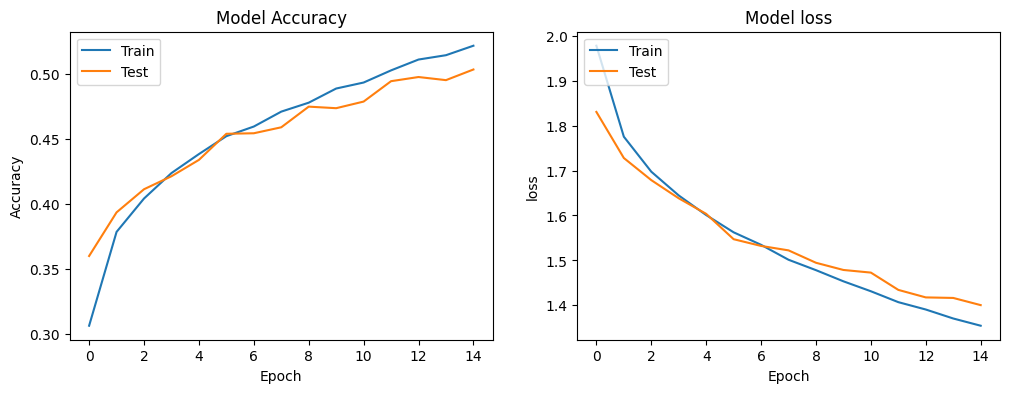

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()